# Inaugural Project 2024



**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)
- 3. [Answers to questions](#toc3_)
	- 3.1 [Question 1](#toc3_1_)
	- 3.2 [Question 2](#toc3_2_)
	- 3.3 [Question 3](#toc3_3_)
	- 3.4 [Question 4](#toc3_4_)
	- 3.4.1 [Question 4a](#toc3_4_1_) 
	- 3.4.2 [Question 4b](#toc3_4_2_)  
	- 3.5 [Question 5](#toc3_5_)
	- 3.5.1 [Question 5a](#toc3_5_1_)    
	- 3.5.2 [Question 5b](#toc3_5_2_)        

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

import numpy as np

from testFile import InauguralProjectClass

#Import optimize from scipy for question 5
from scipy import optimize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'InauguralProject'

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [57]:
model = InauguralProjectClass()

### 3. <a id='toc2_1_'></a>[Answers to questions](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Question 1](#toc0_)

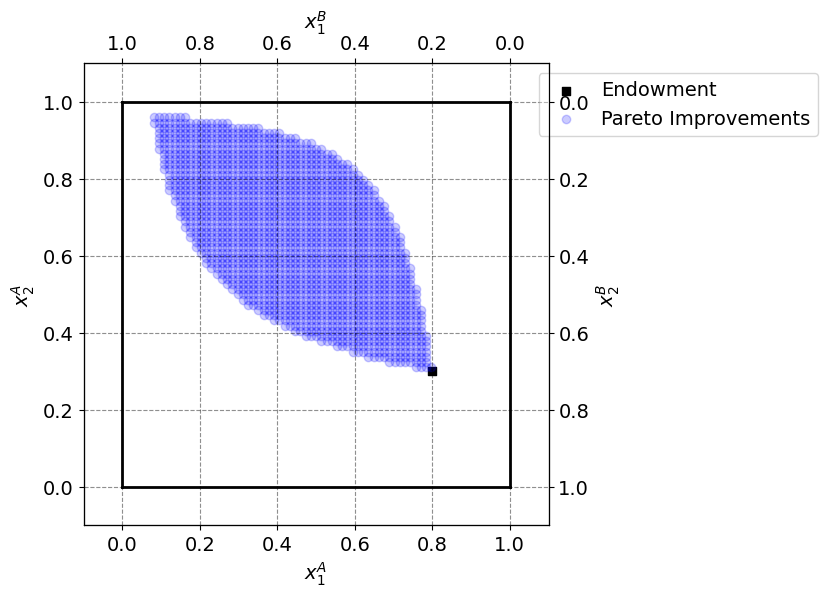

In [58]:
# Initialize model
par = model.par

# We calculate the initial utilities
U_A_initial = model.utility_A(par.w1A, par.w2A)
U_B_initial = model.utility_B(par.w1B, par.w2B)

# Generate grid for x1A and x2A
N = 75
x1A_vals = np.linspace(0, 1, N)
x2A_vals = np.linspace(0, 1, N)
x1A_grid, x2A_grid = np.meshgrid(x1A_vals, x2A_vals)

# Pareto improvements grid
pareto_improvements = np.zeros(x1A_grid.shape, dtype=bool)

# Checking for Pareto improvements
for i in range(N):
    for j in range(N):
        x1A = x1A_grid[i,j]
        x2A = x2A_grid[i,j]
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A, x2A) >= U_A_initial and model.utility_B(x1B, x2B) >= U_B_initial:
            pareto_improvements[i,j] = True


# Plotting setup (using the given code for a basic Edgeworth box)
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A's endowment
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='Endowment')

# Pareto improvements
ax_A.scatter(x1A_grid[pareto_improvements], x2A_grid[pareto_improvements], color='blue', alpha=0.2, label='Pareto Improvements')

# Limits
w1bar, w2bar = 1.0, 1.0
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6,1.0))

plt.show()


### 3.2. <a id='toc3_2_'></a>[Question 2](#toc0_)

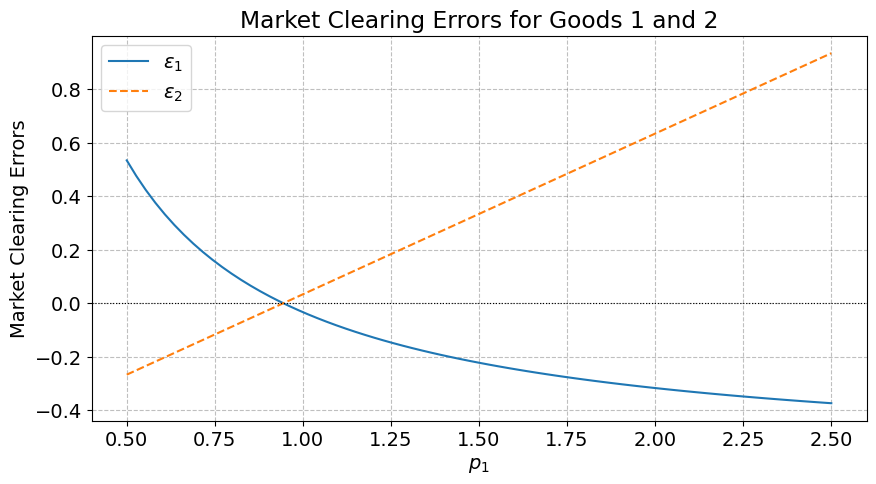

In [59]:
eps1_values = []
eps2_values = []

# Given the information from the question, we set up the range from 0.5 to 2.5 with N = 75
p1_values = np.linspace(0.5, 2.5, 75)

for p1 in p1_values:
    eps1, eps2 = model.check_market_clearing(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)
    
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(p1_values, eps1_values, label='$\epsilon_1$')
plt.plot(p1_values, eps2_values, label='$\epsilon_2$', linestyle='--')
plt.axhline(0, color='black', linewidth=0.8, linestyle=':')
plt.xlabel('$p_1$')
plt.ylabel('Market Clearing Errors')
plt.legend()
plt.title('Market Clearing Errors for Goods 1 and 2')
plt.show()

### 3.3. <a id='toc3_3_'></a>[Question 3](#toc0_)

In [60]:
# We convert the list of errors to a numpy array
eps1_values = np.array(eps1_values)

# We find the index of the minimum absolute error
min_error_index = np.argmin(np.abs(eps1_values))

# We find the corresponding p1 value for the minimum absolute error
market_clearing_price = p1_values[min_error_index]

print(f"The market clearing price p1 is {market_clearing_price:.2f}")


The market clearing price p1 is 0.93


### 3.4. <a id='toc3_4_'></a>[Question 4](#toc0_)

### 3.4.1. <a id='toc3_4_1_'></a>[Question 4a](#toc0_)

In [61]:
max_utility = -np.inf  # Initialize maximum utility to negative infinity
optimal_p1 = None  # Placeholder for the optimal p1 value

# We use p1_values that we defined in question 2
for p1 in p1_values:
    # Calculate demands for consumer A at this p1
    x1A, x2A = model.demand_A(p1)
    
    # Calculate utility for A given these demands
    utility_A = model.utility_A(x1A, x2A)
    
    # If this utility is higher than the current maximum, update max_utility and optimal_p1
    if utility_A > max_utility:
        max_utility = utility_A
        optimal_p1 = p1

print(f"The optimal value of p1 is {optimal_p1} and the maximum utility for consumer A is {max_utility}")



The optimal value of p1 is 2.5 and the maximum utility for consumer A is 0.8966987730519458


### 3.4.2. <a id='toc3_4_1_'></a>[Question 4b](#toc0_)

In [62]:
max_utility = -np.inf  # Initialize maximum utility to negative infinity
optimal_p1 = None  # Placeholder for the optimal p1 value

# We use p1_values that we defined in question 2
for p1 in p1_values:
    if p1 > 0:
        # Calculate demands for consumer A at this p1
        x1A, x2A = model.demand_A(p1)
    
        # Calculate utility for A given these demands
        utility_A = model.utility_A(x1A, x2A)
    
        # If this utility is higher than the current maximum, update max_utility and optimal_p1
        if utility_A > max_utility:
            max_utility = utility_A
            optimal_p1 = p1
            # print(max_utility, "and", optimal_p1)

print(f"The optimal value of p1 is {optimal_p1} and the maximum utility for consumer A is {max_utility}")


The optimal value of p1 is 2.5 and the maximum utility for consumer A is 0.8966987730519458


For question 4b: Almost the same code as in 4a and it is the same result. Makes sense since all of the values of p1 in P1 is greater than zero hence the two tasks are more or less the same.

### 3.5. <a id='toc3_5_'></a>[Question 5](#toc0_)

### 3.5.1 <a id='toc3_5_1_'></a>[Question 5a](#toc0_)

In [63]:
# Objective function to be maximized (negative for minimization)
def objective(x):
    x1A, x2A = x
    return -model.utility_A(x1A, x2A)  # We minimize the negative utility

# Constraint ensuring both A and B are at least as well off as with their endowments
constraints = [
    {'type': 'ineq', 'fun': lambda x: model.utility_A(x[0], x[1]) - U_A_initial},
    {'type': 'ineq', 'fun': lambda x: model.utility_B(1-x[0], 1-x[1]) - U_B_initial}
]

# Bounds for x1A and x2A
bounds = [(0, 1), (0, 1)]

# Initial guess for the allocation
initial_guess = [par.w1A, par.w2A]

# Run the optimization
result = optimize.minimize(objective, initial_guess, bounds=bounds, constraints=constraints)

if result.success:
    optimal_x1A, optimal_x2A = result.x
    optimal_utility_A = -result.fun  # Convert back to positive for utility
    print(f"The optimal allocation for consumer A is x1A = {optimal_x1A} and x2A = {optimal_x2A} which yields the utility {optimal_utility_A}")
else:
    print("The optimization was not successful", result.message)


The optimal allocation for consumer A is x1A = 0.5757424934377142 and x2A = 0.8444397130890112 which yields the utility 0.7432276550447664


### 3.5.2. <a id='toc3_5_2_'></a>[Question 5b](#toc0_)